### Prophetで株価予測してみる
@see https://www.avelio.co.jp/math/wordpress/?p=117

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from pandas_datareader.data import DataReader
import datetime

In [2]:
start = datetime.date(2018, 1, 1)
end = datetime.date(2021, 1, 1)
data_train = DataReader('9983.T', 'yahoo', start, end)

In [3]:
data_train['ds'] = data_train.index
data_train = data_train.rename({'Adj Close':'y'}, axis=1)

In [4]:
data_train['y'] = np.log(data_train['y'])

In [5]:
model = Prophet()
model.fit(data_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [6]:
'''
params = {'growth': 'linear',
          'changepoints': None,
          'n_changepoints': 25,
          'changepoint_range': 0.8,
          'yearly_seasonality': 'auto',
          'weekly_seasonality': 'auto',
          'daily_seasonality': 'auto',
          'holidays': None,
          'seasonality_mode': 'additive',
          'seasonality_prior_scale': 10.0,
          'holidays_prior_scale': 10.0,
          'changepoint_prior_scale': 0.05,
          'mcmc_samples': 0,
          'interval_width': 0.80,
          'uncertainty_samples': 1000,
          'stan_backend': None
         }
model = Prophet(**params)
model.fit(data_train)
'''

"\nparams = {'growth': 'linear',\n          'changepoints': None,\n          'n_changepoints': 25,\n          'changepoint_range': 0.8,\n          'yearly_seasonality': 'auto',\n          'weekly_seasonality': 'auto',\n          'daily_seasonality': 'auto',\n          'holidays': None,\n          'seasonality_mode': 'additive',\n          'seasonality_prior_scale': 10.0,\n          'holidays_prior_scale': 10.0,\n          'changepoint_prior_scale': 0.05,\n          'mcmc_samples': 0,\n          'interval_width': 0.80,\n          'uncertainty_samples': 1000,\n          'stan_backend': None\n         }\nmodel = Prophet(**params)\nmodel.fit(data_train)\n"

In [7]:
future = model.make_future_dataframe(
    periods=365, # 予測する日数
    freq='d'   # 単位(d: 日)
)

/opt/conda/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


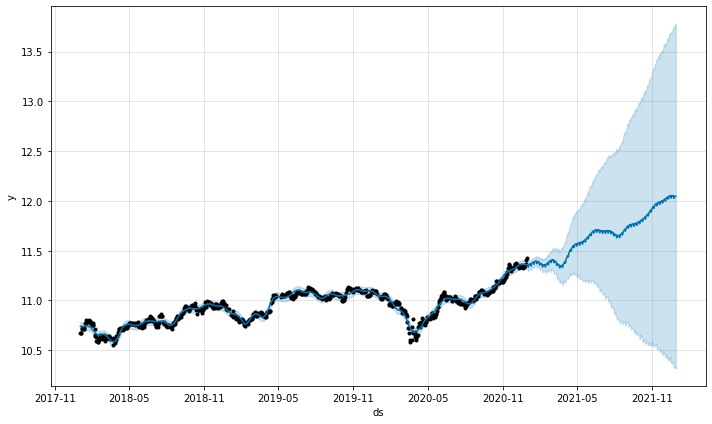

In [8]:
pred = model.predict(future)
fig_pred = model.plot(pred)

/opt/conda/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


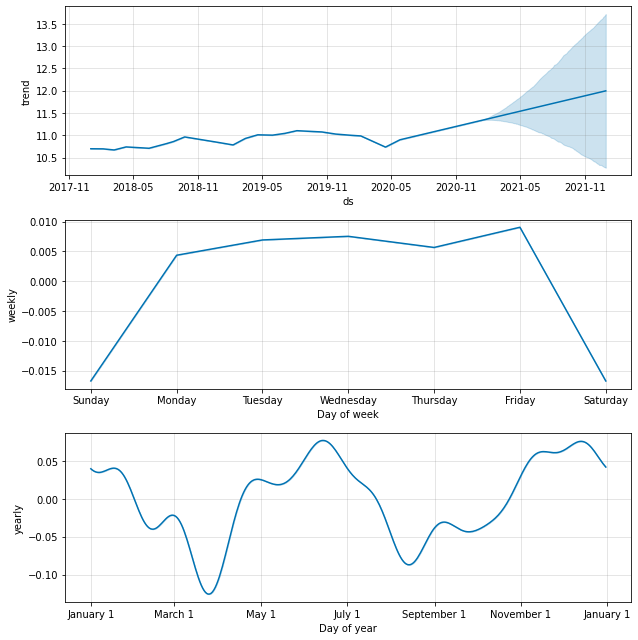

In [9]:
fig_components = model.plot_components(pred)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


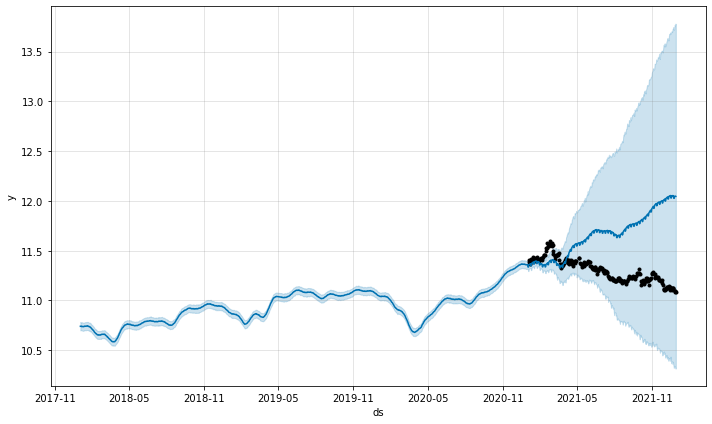

In [10]:
start = datetime.date(2021, 1, 1)
end = datetime.date(2022, 1, 1)

data_test = DataReader('9983.T', 'yahoo', start, end)

data_test['ds'] = data_test.index
data_test = data_test.rename({'Adj Close':'y'} ,axis=1)
data_test['y'] = np.log(data_test['y'])

model = Prophet()
model.fit(data_test)

fig_test = model.plot(pred)